# Task 1:Task 1: EDA and Visualization of a Real-World Dataset


In [2]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


* loading the dataset

In [3]:
df=sns.load_dataset('titanic')

* veiwing the dataset

In [4]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
print("number of rows are :",df.shape[0])
print("number of columns are :",df.shape[1])

number of rows are : 891
number of columns are : 15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


* checking overall statistics of the dataset

In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Now Doing some Basic Data cleaning Before Going on for further analysis.

* Checking null values in the dataset

In [9]:
# checking percantage
df.isnull().sum()*100/len(df)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

* Lets visualize it.

<Axes: >

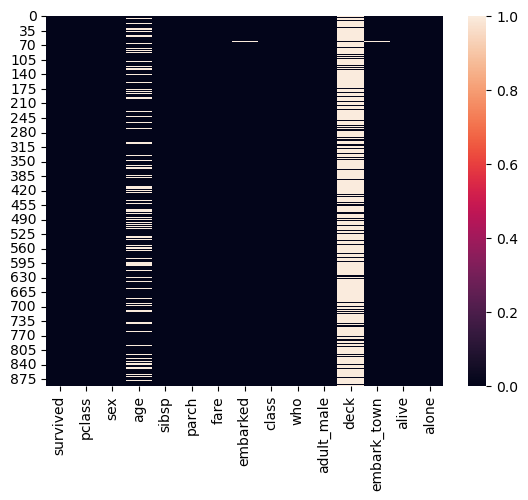

In [10]:
sns.heatmap(df.isnull())

`We can see there is null values in age,deck,embarked and embark_town so we need to deal it with first`

* Dropping the Deck column because the missing values percentage is very high.

In [11]:
# dropping the deck columns
df=df.drop(columns='deck')

In [12]:
print("Total number of columns after droping deck",df.shape[1])

Total number of columns after droping deck 14


* Now impute The missing Values in other columns using some basic statistical techniques like mean,median and mode.

In [13]:
print("Imputing missing values in 'embark_town' using mode (most frequent value):")
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


print("\nImputing missing values in 'embarked' using mode (most frequent value):")
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


print("\nImputing missing values in 'age' using mean:")
df['age'].fillna(df['age'].mean(), inplace=True)


Imputing missing values in 'embark_town' using mode (most frequent value):

Imputing missing values in 'embarked' using mode (most frequent value):

Imputing missing values in 'age' using mean:


C:\Users\user\AppData\Local\Temp\ipykernel_7016\653228050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7016\653228050.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

* Now let's check the missing Values

In [14]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Now finally we are done with the missing values now let's move on to remove duplicates.

In [15]:
# checking and removing duplicates if any?

df=df.drop_duplicates()
print("Total number of rows after removing duplicates",df.shape[0])


Total number of rows after removing duplicates 780


## Now let's move towards the Outlier removal Process.

In [16]:
num_cols = df[['age','fare']]
num_cols

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
885,39.000000,29.1250
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


* Let's visualize the outliers

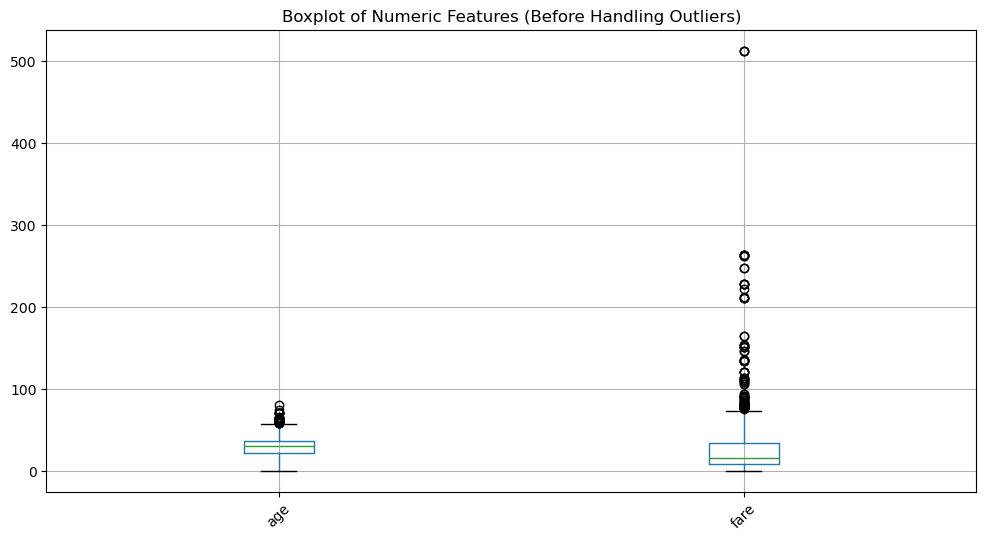

In [17]:
plt.figure(figsize=(12, 6))
num_cols.boxplot()
plt.title("Boxplot of Numeric Features (Before Handling Outliers)")
plt.xticks(rotation=45)
plt.show()


* Now Let's See the distribution of the data.


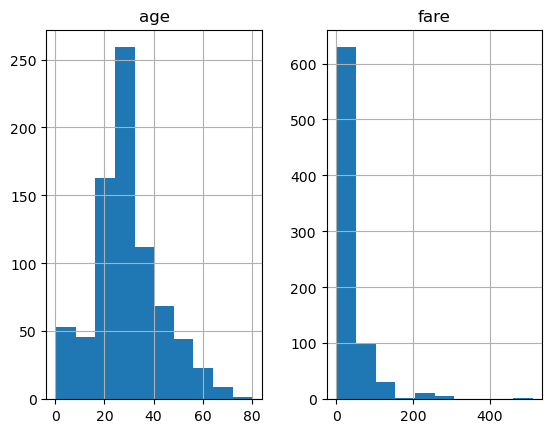

In [18]:
# plotting a histogram.

num_cols.hist()
plt.show()


* let's remove the outiers in age column using IQR Method

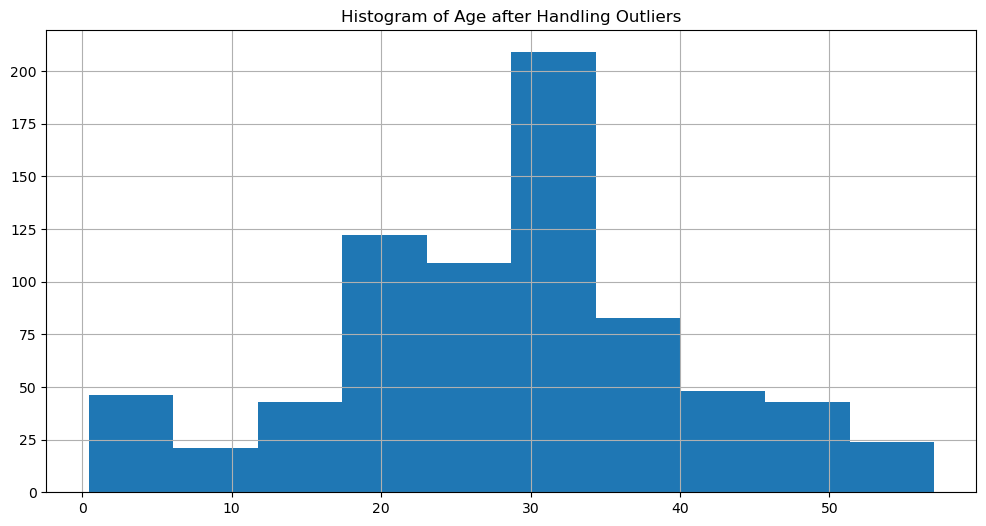

In [19]:
# removing outliers in age column using Iqr Method

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# plotting a histogram after removing outliers

plt.figure(figsize=(12, 6))
df['age'].hist()
plt.title("Histogram of Age after Handling Outliers")
plt.show()

* Now the data looks normal now let's move towards the fare varialbe.First we will see its distribution.


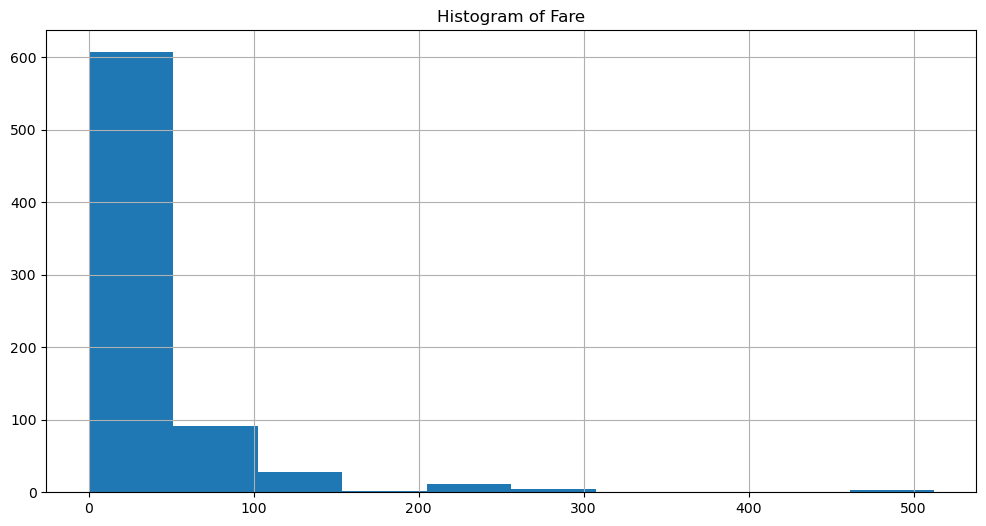

In [20]:
# plotting the fare distribution.

plt.figure(figsize=(12, 6))
df['fare'].hist()
plt.title("Histogram of Fare")
plt.show()

* The histogram shows that the fare values are highly right-skewed (long tail on the right side).
* This means that a few passengers paid very high fares, causing extreme values (outliers).
* Such skewness can negatively affect machine learning models, as they assume normally distributed data.

`Checking the skewness score`

In [21]:
from scipy.stats import skew

# Calculate skewness
skewness_value = df['fare'].skew()
print(f"Skewness of Fare: {skewness_value:.2f}")

Skewness of Fare: 4.70


* If skewness > 0.5, it means the data is positively skewed (right-skewed).
* If skewness > 1, it is highly skewed, and we must apply a log transformation.

### Applying log transformation

In [22]:
# Apply Log Transformation
df['fare'] = np.log1p(df['fare'])  # log1p to handle zero values safely


✔️ Why Log Transformation?

* Reduces the impact of extreme values (outliers).
* Makes the data more normally distributed, which improves model performance.
* Prevents large values from dominating calculations.

**Now Plotting The data**


c:\Users\user\miniconda3\envs\TF_GPU\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


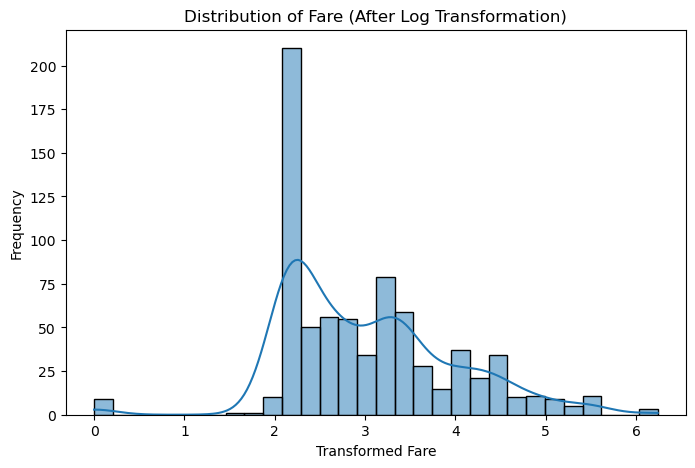

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title("Distribution of Fare (After Log Transformation)")
plt.xlabel("Transformed Fare")
plt.ylabel("Frequency")
plt.show()

* Now it kinda Looks Normal Which would be better to feed the model and generate accurate results.

## Now Most of the Data Cleaning Now we would move towards some Data Analysis.

In [24]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,2.110213,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,4.280593,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,2.188856,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,3.990834,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,2.202765,S,Third,man,True,Southampton,no,True


* Lets see how many people were died.

(-1.0999984493349073,
 1.0999909258868161,
 -1.099999873831615,
 1.0999999939919816)

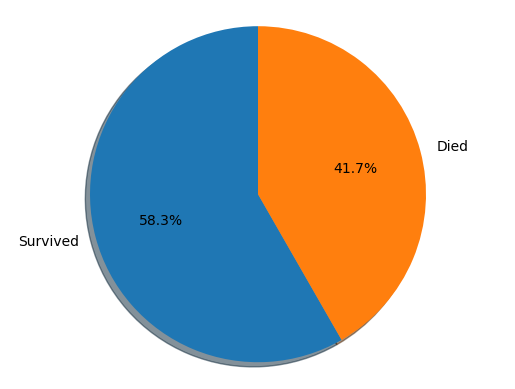

In [25]:
# Lets see how many people were died.

df['survived'].value_counts()

# we can also visualize this using a pie chart


labels = 'Survived', 'Died'
sizes = [df['survived'].value_counts()[0], df['survived'].value_counts()[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

- We can See 58.3% percent people survived and 41.7% Peple Dies.

`Now let's see how many people were died based on gender in each class.`



c:\Users\user\miniconda3\envs\TF_GPU\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\user\miniconda3\envs\TF_GPU\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='class', ylabel='survived'>

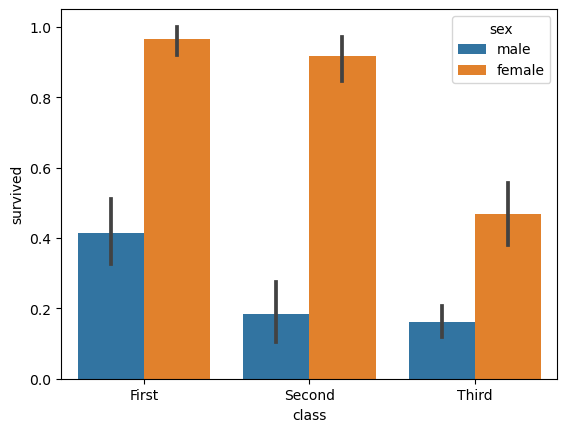

In [26]:
sns.barplot(x='class', y='survived', hue='sex', data=df)

### **Key Observations:**
- **Females had a significantly higher survival rate** compared to males across all classes.
- **First and Second-class females had the highest survival rates (~90-100%)**.
- **Males had a much lower survival rate, especially in Second and Third class**.
- **Third-class passengers had the lowest survival rates overall**, but females still had better chances than males.

### **Conclusion:**
- The **"Women and Children First" policy** is evident in the survival rates.
- **Class played a major role in survival**, with **First-class passengers having the best chances**.
- **Third-class males had the lowest survival rate**, reinforcing the social disparities in the Titanic tragedy.

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,2.110213,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,4.280593,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,2.188856,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,3.990834,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,2.202765,S,Third,man,True,Southampton,no,True


## Doing some Feature Engineering To help our analysis.
`We will categorize passengers into different age groups:`

* Child (0-12 years)
* Teenager (13-19 years)
* Young Adult (20-35 years)
* Middle-Aged (36-55 years)
* Senior (56+ years)

In [28]:
def categorize_age(age):
    if age < 13:
        return "Child"
    elif 13 <= age < 20:
        return "Teenager"
    elif 20 <= age < 36:
        return "Young Adult"
    elif 36 <= age < 56:
        return "Middle-Aged"
    else:
        return "Senior"

# Apply function to create new column
df['age_group'] = df['age'].apply(categorize_age)

# Display first few rows
df[['age', 'age_group', 'survived']].head()

,age,age_group,survived
0,22.0,Young Adult,0
1,38.0,Middle-Aged,1
2,26.0,Young Adult,1
3,35.0,Young Adult,1
4,35.0,Young Adult,0


* Now, let's check how many passengers survived in each age category.

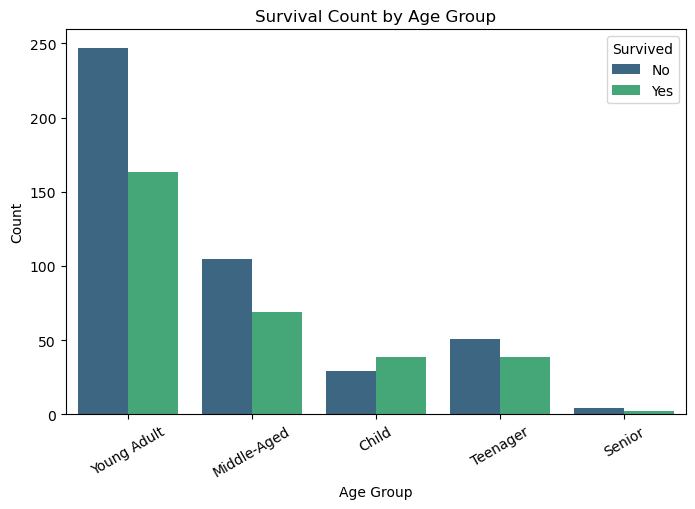

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="age_group", hue="survived", palette="viridis")
plt.title("Survival Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

* In terms of percentages.

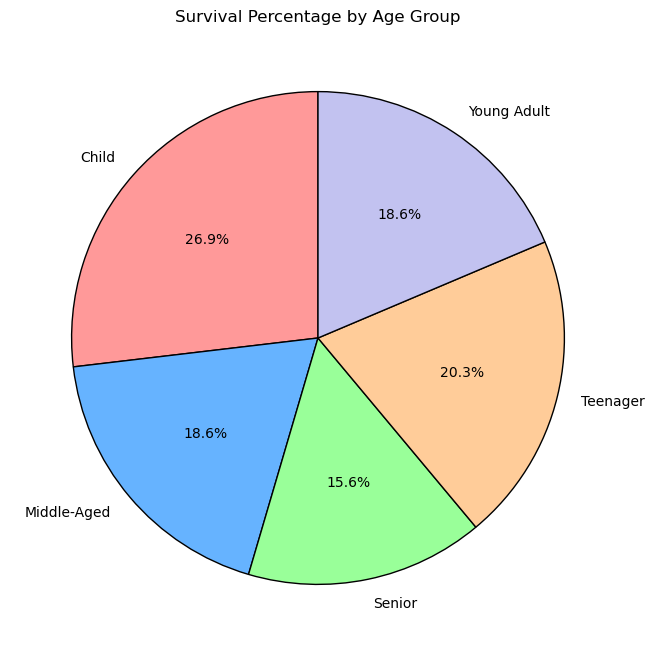

In [30]:
age_survival_counts = df.groupby("age_group")["survived"].mean() * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
colors = ["#ff9999","#66b3ff","#99ff99","#ffcc99", "#c2c2f0"]
age_survival_counts.plot(kind="pie", autopct="%.1f%%", colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Survival Percentage by Age Group")
plt.ylabel("")  # Hide the y-label
plt.show()

* Children had the highest survival rate (26.9%), while Seniors had the lowest (15.6%).
* Young Adults had the most passengers, but many did not survive.
* Middle-aged and Teenagers had moderate survival rates (~18-20%).

`Did passenger class impact survival?`

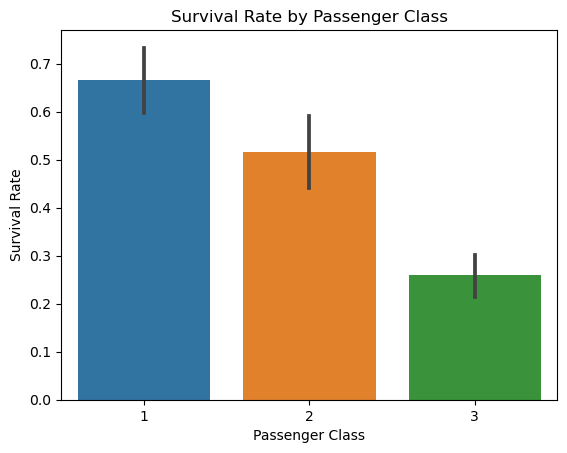

In [31]:

sns.barplot(x="pclass", y="survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


* First-class passengers had the highest survival rate (~65-70%).
* Second-class passengers had a moderate survival rate (~50-55%).
* Third-class passengers had the lowest survival rate (~25%), meaning they were the most vulnerable.
* This indicates that passenger class significantly influenced survival, with wealthier passengers having a better chance of survival.

## Now checking The correlation int he dataset.

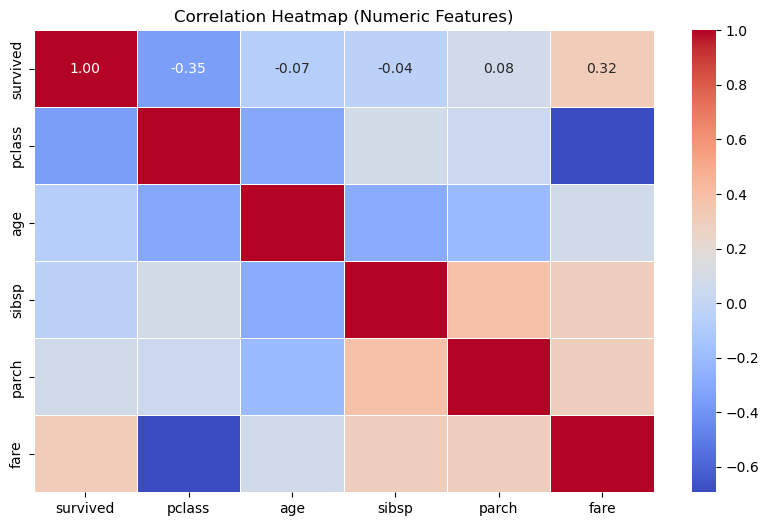

In [33]:
numeric_df = df.select_dtypes(include=['number'])  # Excludes categorical columns

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
